In [4]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.0 MB/s eta 0:00:00


In [5]:
import warnings
warnings.filterwarnings('ignore')
# Satandar library for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import pickle
# For Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
# Modul selection
# For Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
# Tambahan
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error

# 1.&nbsp;Import Data

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/Digital Skola/FINAL PROJECT/diamonds.csv')
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [8]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [9]:
# Pengecekan nilai unique untuk setiap kolom agar mengetahui dataset
# Unique / min / max
data ['z'].unique().max()

31.8

## Diamonds Dataset

Dataset diamond berisi beberapa atribut dan harga dengan total data 53940 berlian. Terdapat 11 atribut yang disertakan dalam dataset termasuk target yaitu harga.

*   carat (0.2-5.01): Carat adalah berat fisik berlian yang diukur dalam karat.
*   cut (Ideal, Premium, Good, Very Good, Fair): Model potongan berlian
*   color: warna berlian (['E' 'I' 'J' 'H' 'F' 'G' 'D'])
*   clarity (['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF'])
*   depth (43-79) merupakan tinggi berlian: Ini adalah persentase total kedalaman yang sama dengan z / mean(x, y) = 2 * z / (x + y). Kedalaman berlian adalah tinggi berlian (dalam milimeter) yang diukur dari culet (ujung bawah) hingga table (permukaan atas datar).
*   table (43-95): Ini adalah lebar bagian ukuran atas berlian relatif terhadap titik terlebar.
*   price dalam dolar AS ($326 - $18,823): Ini adalah harga berlian dalam dolar AS.
*   x (0 - 10.74):(mm)
*   y (0 - 58.9): (mm)
*   z (0 - 31.8): (mm)

Tentang Data

Dataset diamond berisi beberapa atribut dan harga dengan total data 53940 berlian. Terdapat 11 atribut yang disertakan dalam dataset termasuk target yaitu harga.

*   carat (0.2-5.01): Carat adalah berat fisik berlian yang diukur dalam karat.
*   cut (Ideal, Premium, Good, Very Good, Fair): Kualitas potongan. Semakin presisi potongan berlian, semakin baik berlian tersebut, sehingga memiliki grade yang tinggi.
*   color: warna berlian : dari D = Terbaik sampai J = Terburuk: Warna berlian kualitas permata hadir dalam banyak nuansa. Dalam rentang dari tidak berwarna hingga kuning muda atau coklat muda. Berlian tidak berwarna adalah yang paling langka. Warna alami lainnya (biru, merah, merah muda misalnya) dikenal sebagai "fancy," dan penilaian warnanya berbeda dari berlian putih tidak berwarna.
*   clarity (I1 (terburuk), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (terbaik)): Berlian dapat memiliki karakteristik internal yang dikenal sebagai inklusi atau karakteristik eksternal yang dikenal sebagai noda. Berlian tanpa inklusi atau noda sangat langka; namun, sebagian besar karakteristik hanya dapat dilihat dengan pembesaran.
*   depth (43-79) merupakan tinggi berlian: Ini adalah persentase total kedalaman yang sama dengan z / mean(x, y) = 2 * z / (x + y). Kedalaman berlian adalah tinggi berlian (dalam milimeter) yang diukur dari culet (ujung bawah) hingga table (permukaan atas datar).
*   table (43-95): Ini adalah lebar bagian ukuran atas berlian relatif terhadap titik terlebar.
*   price dalam dolar AS ($326 - $18,823): Ini adalah harga berlian dalam dolar AS.
*   x (0 - 10.74): Panjang berlian (mm)
*   y (0 - 58.9): Lebar berlian (mm) berdasarkan dataset
*   z (0 - 31.8): Kedalaman berlian (mm) berdasarkan dataset

In [10]:
data.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


# 2.&nbsp;EDA (Exploratory Data Analysis)

In [11]:
# Mengetahui statistik dataset
# Menampikan type data numerik
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
# Pengecekan apakah terdapat nilai NULL pada dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [13]:
data = data.drop(['Unnamed: 0'], axis = 1)
data.shape

(53940, 10)

In [14]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [15]:
# Pemeriksaan typedata dan missing value
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['price'], float64: ['carat', 'depth', 'table', 'x', 'y', 'z'], object: ['cut', 'color', 'clarity']}

In [16]:
# Pengecekan apakah terdapat missing value
data.isna().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [17]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [18]:
# Mengecek data berdasarkan type data apakah terdapat missing value
data.select_dtypes(include='number').isnull()

,carat,depth,table,price,x,y,z
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False


In [19]:
data.isnull()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False


In [20]:
# Rename data colom
rename_col = {
    'x' : 'panjang_berlian',
    'y' : 'lebar_berlian',
    'z' : 'kedalaman_berlian'
}
data = data.rename(columns=rename_col)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   carat              53940 non-null  float64
 1   cut                53940 non-null  object 
 2   color              53940 non-null  object 
 3   clarity            53940 non-null  object 
 4   depth              53940 non-null  float64
 5   table              53940 non-null  float64
 6   price              53940 non-null  int64  
 7   panjang_berlian    53940 non-null  float64
 8   lebar_berlian      53940 non-null  float64
 9   kedalaman_berlian  53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [22]:
# Pengecekan apakah terdapat data duplicate dalam dataset atau tidak
duplicate_rows = data.duplicated()
num_duplicate_rows = duplicate_rows.sum()
print(f"Jumlah data duplikat : {num_duplicate_rows}")

Jumlah data duplikat : 146


Catatan : setelah melakukan pengecekan data terkait data duplikasi ternyata terdapat 146 data duplikat dalam dataset yang dimiliki, sehingga langkah yang diambil ialah melakukan penghapusan data duplikat dengan alasan bahwa memastikan nantinya model tidak bias dan akurat dengan pertimbangan berdasarkan data yang akan digunakan ketika melakukan prediksi.

In [23]:
duplicate_data = data[data.duplicated()]
print("Data Duplicated")
print(duplicate_data)

Data Duplicated
       carat    cut color clarity  depth  table  price  panjang_berlian  \
1005    0.79  Ideal     G     SI1   62.3   57.0   2898             5.90   
1006    0.79  Ideal     G     SI1   62.3   57.0   2898             5.90   
1007    0.79  Ideal     G     SI1   62.3   57.0   2898             5.90   
1008    0.79  Ideal     G     SI1   62.3   57.0   2898             5.90   
2025    1.52   Good     E      I1   57.3   58.0   3105             7.53   
...      ...    ...   ...     ...    ...    ...    ...              ...   
47969   0.52  Ideal     D     VS2   61.8   55.0   1919             5.19   
49326   0.51  Ideal     F    VVS2   61.2   56.0   2093             5.17   
49557   0.71   Good     F     SI2   64.1   60.0   2130             0.00   
50079   0.51  Ideal     F    VVS2   61.2   56.0   2203             5.19   
52861   0.50   Fair     E     VS2   79.0   73.0   2579             5.21   

       lebar_berlian  kedalaman_berlian  
1005            5.85               3.66  

In [24]:
# Menghapus data duplikat
data_clean = data.drop_duplicates()
data_clean

,carat,cut,color,clarity,depth,table,price,panjang_berlian,lebar_berlian,kedalaman_berlian
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [25]:
data_clean.describe()

,carat,depth,table,price,panjang_berlian,lebar_berlian,kedalaman_berlian
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [26]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   carat              53794 non-null  float64
 1   cut                53794 non-null  object 
 2   color              53794 non-null  object 
 3   clarity            53794 non-null  object 
 4   depth              53794 non-null  float64
 5   table              53794 non-null  float64
 6   price              53794 non-null  int64  
 7   panjang_berlian    53794 non-null  float64
 8   lebar_berlian      53794 non-null  float64
 9   kedalaman_berlian  53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


# 3.&nbsp;Data Visualization

## Corelasi Histogram type data 'Object'

In [27]:
data_clean['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

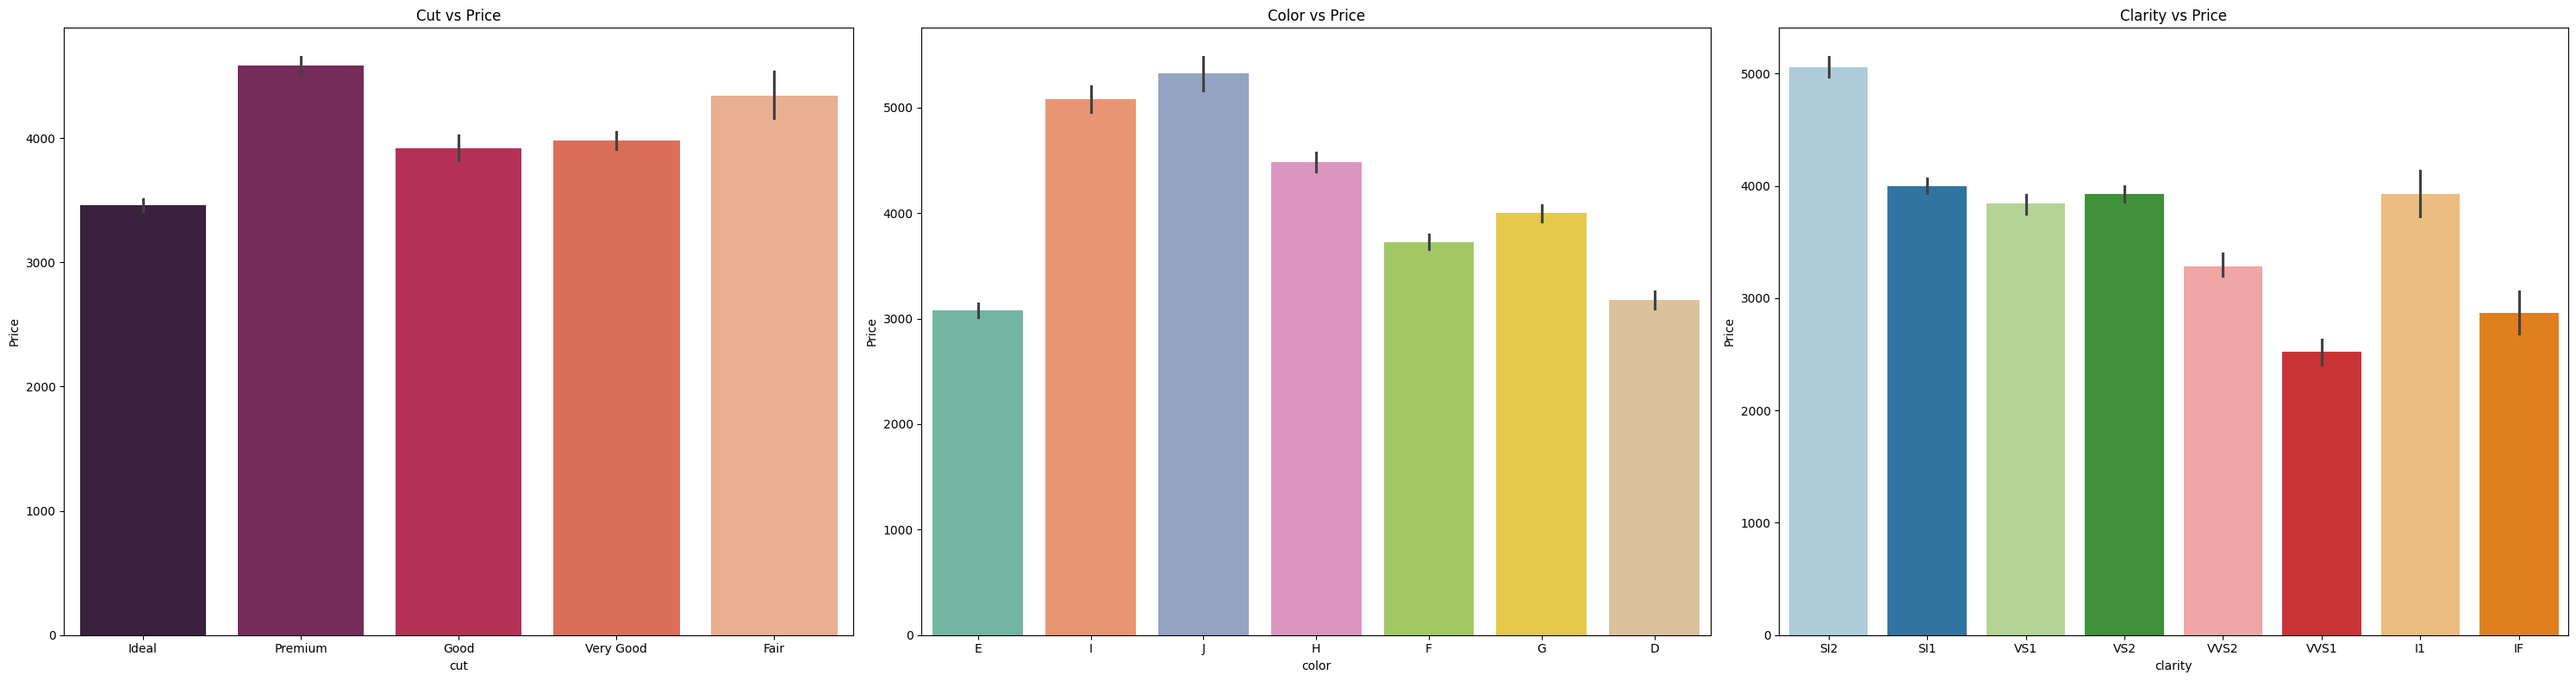

In [28]:
# Melihat corelation harga berdasarkan data object/kategorikal
# Rata-rata/mean
fig, ax = plt.subplots(1, 3, figsize=(30, 8))
palette = ["rocket", "Set2", "Paired"]
for i, col in enumerate(data_clean.select_dtypes(include='object').columns):
  sns.barplot(x=col, y='price', data = data_clean, ax=ax[i], palette=palette[i])
  ax[i].set_ylabel('Price')
  ax[i].set_title(f'{col.capitalize()} vs Price')

plt.tight_layout()
plt.show()

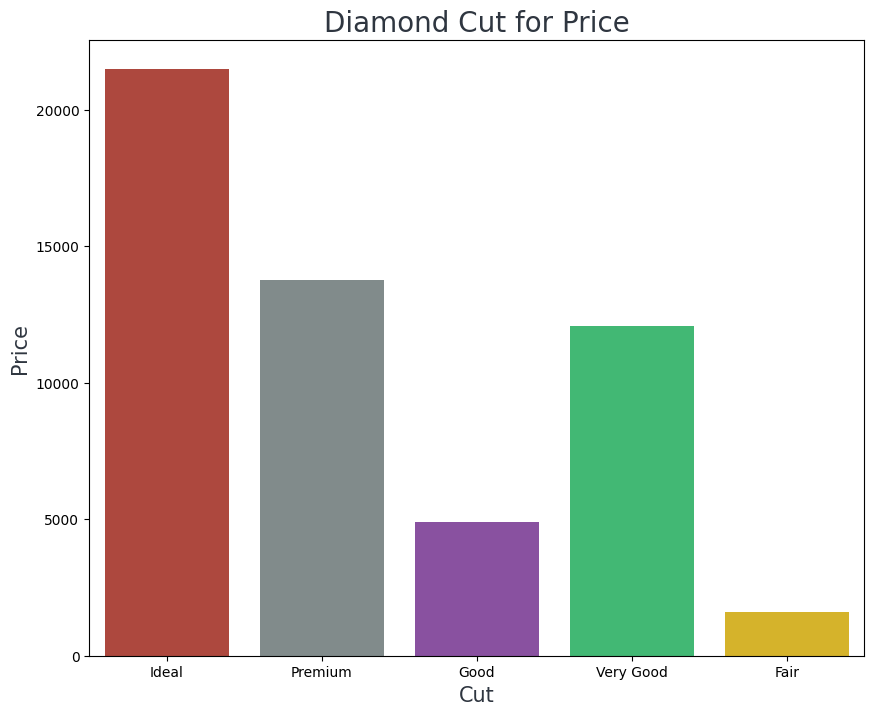

In [29]:
# Untuk melihat distribusi sebaran data berdasarkan harga
plt.figure(figsize=(10,8))
cols = ["#c0392b","#7f8c8d","#8e44ad","#2ecc71","#f1c40f"]
ax = sns.barplot(x="cut",y="price", data=data_clean, palette=cols, estimator=len)
ax.set_title("Diamond Cut for Price", color="#2f3640", fontsize=20)
ax.set_ylabel("Price", color="#2f3640", fontsize=15)
ax.set_xlabel("Cut", color="#2f3640", fontsize=15)
plt.show()

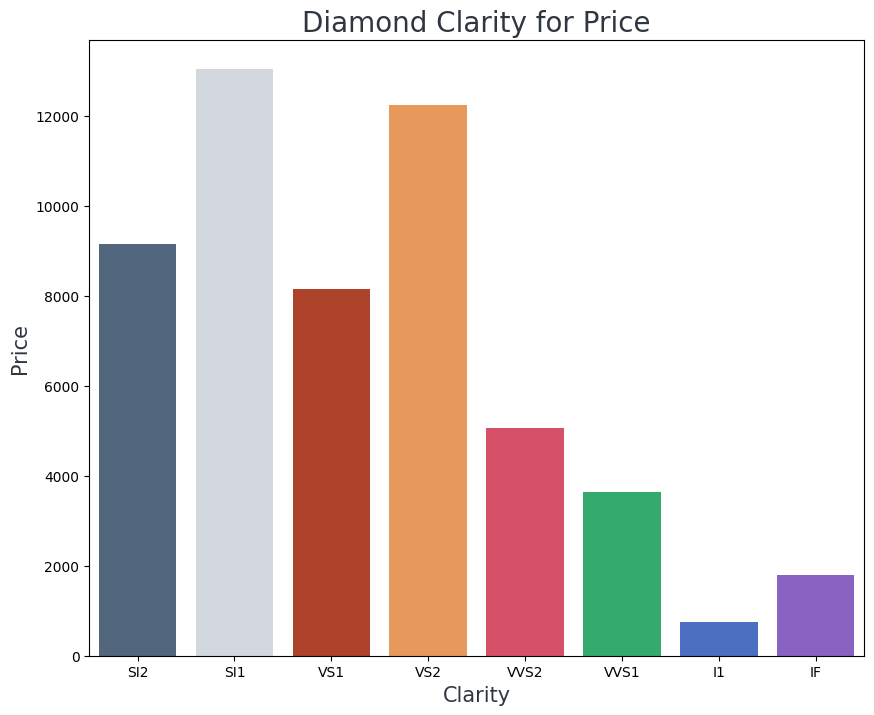

In [30]:
# Untuk melihat distribusi sebaran data berdasarkan harga
plt.figure(figsize=(10,8))
cols = ["#4b6584","#d1d8e0","#c23616","#fd9644","#eb3b5a", "#20bf6b", "#3867d6", "#8854d0"]
ax = sns.barplot(x="clarity",y="price", data=data_clean, palette=cols, estimator=len)
ax.set_title("Diamond Clarity for Price", color="#2f3640", fontsize=20)
ax.set_ylabel("Price", color="#2f3640", fontsize=15)
ax.set_xlabel("Clarity", color="#2f3640", fontsize=15)
plt.show()

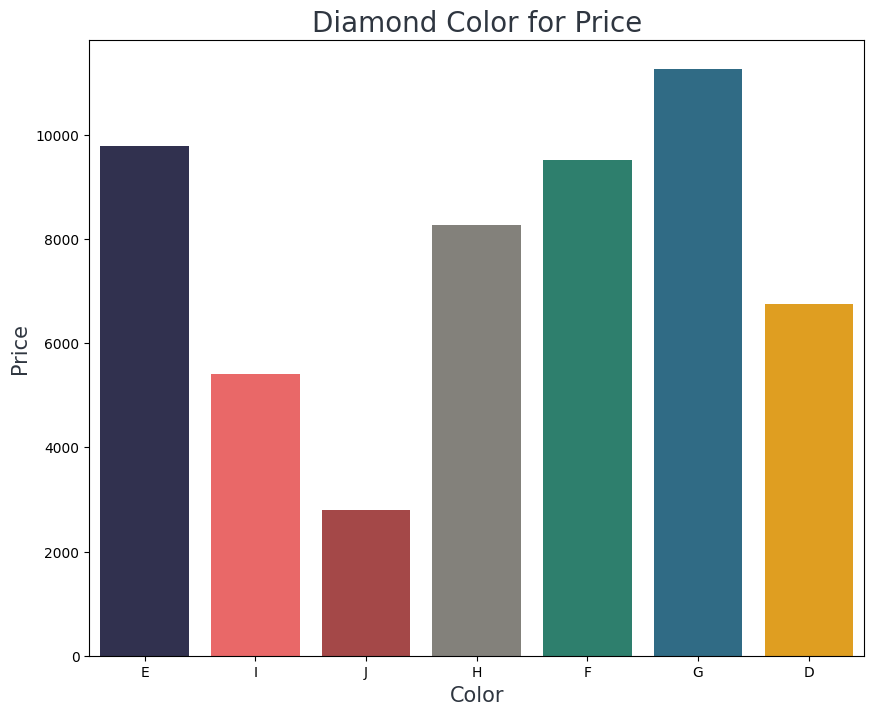

In [31]:
# Untuk melihat distribusi sebaran data berdasarkan harga
# Kesimpulan terkait keterkaitan dan value data
plt.figure(figsize=(10,8))
cols = ["#2c2c54","#ff5252","#b33939","#84817a","#218c74", "#227093", "#ffa801"]
ax = sns.barplot(x="color",y="price", data=data_clean, palette=cols, estimator=len)
ax.set_title("Diamond Color for Price", color="#2f3640", fontsize=20)
ax.set_ylabel("Price", color="#2f3640", fontsize=15)
ax.set_xlabel("Color", color="#2f3640", fontsize=15)
plt.show()

Catatan dari Hasil visualisasi data object :
*   Dari antara cut(potongan berlian), cut 'ideal' merupakan jumlah price tertinggi, kemudian 'fair' terendah
*   Berlian dengan clarity atau kejernihan label 'I1' (terburuk) total price sangat jarang
*   Berlian dengan warna J (terburuk) paling sedikit peminat atau dengan kategori price paling rendah





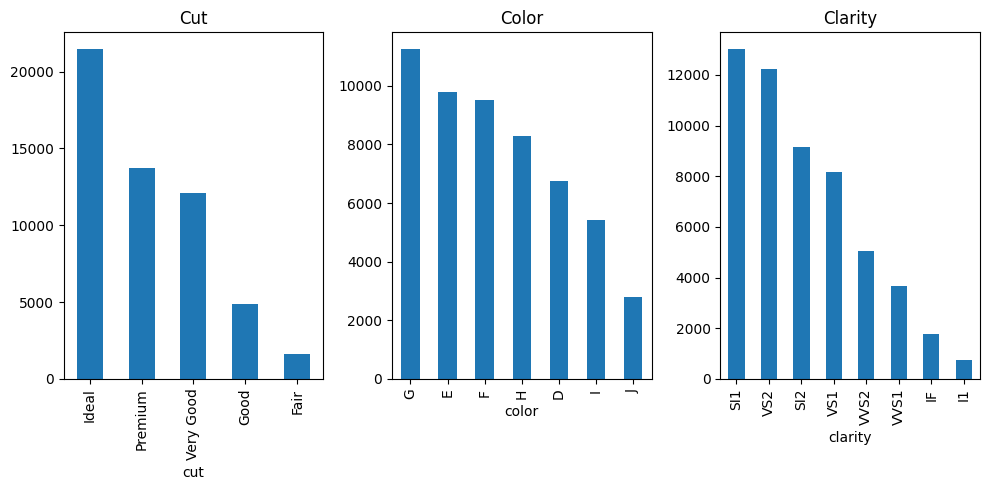

In [32]:
# Hitung frekuensi masing-masing nilai kategori
cut_counts = data_clean['cut'].value_counts()
color_counts = data_clean['color'].value_counts()
clarity_counts = data_clean['clarity'].value_counts()

# Visualisasikan distribusi frekuensi
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
cut_counts.plot(kind='bar', title='Cut')
plt.subplot(1, 3, 2)
color_counts.plot(kind='bar', title='Color')
plt.subplot(1, 3, 3)
clarity_counts.plot(kind='bar', title='Clarity')
plt.tight_layout()
plt.show()

In [33]:
# Mencari presentase masing-masing nilai data object
cut_percentage = data_clean['cut'].value_counts(normalize=True) * 100
color_percentage = data_clean['color'].value_counts(normalize=True) * 100
clarity_percentage = data_clean['clarity'].value_counts(normalize=True) * 100

print("Persentase Cut:\n", cut_percentage)
print("\nPersentase Color:\n", color_percentage)
print("\nPersentase Clarity:\n", clarity_percentage)

Persentase Cut:
 cut
Ideal        39.944975
Premium      25.556754
Very Good    22.435588
Good          9.092092
Fair          2.970592
Name: proportion, dtype: float64

Persentase Color:
 color
G    20.935420
E    18.173030
F    17.697141
H    15.377180
D    12.557163
I    10.051307
J     5.208759
Name: proportion, dtype: float64

Persentase Clarity:
 clarity
SI1     24.225750
VS2     22.733019
SI2     17.009332
VS1     15.161542
VVS2     9.398818
VVS1     6.779566
IF       3.316355
I1       1.375618
Name: proportion, dtype: float64


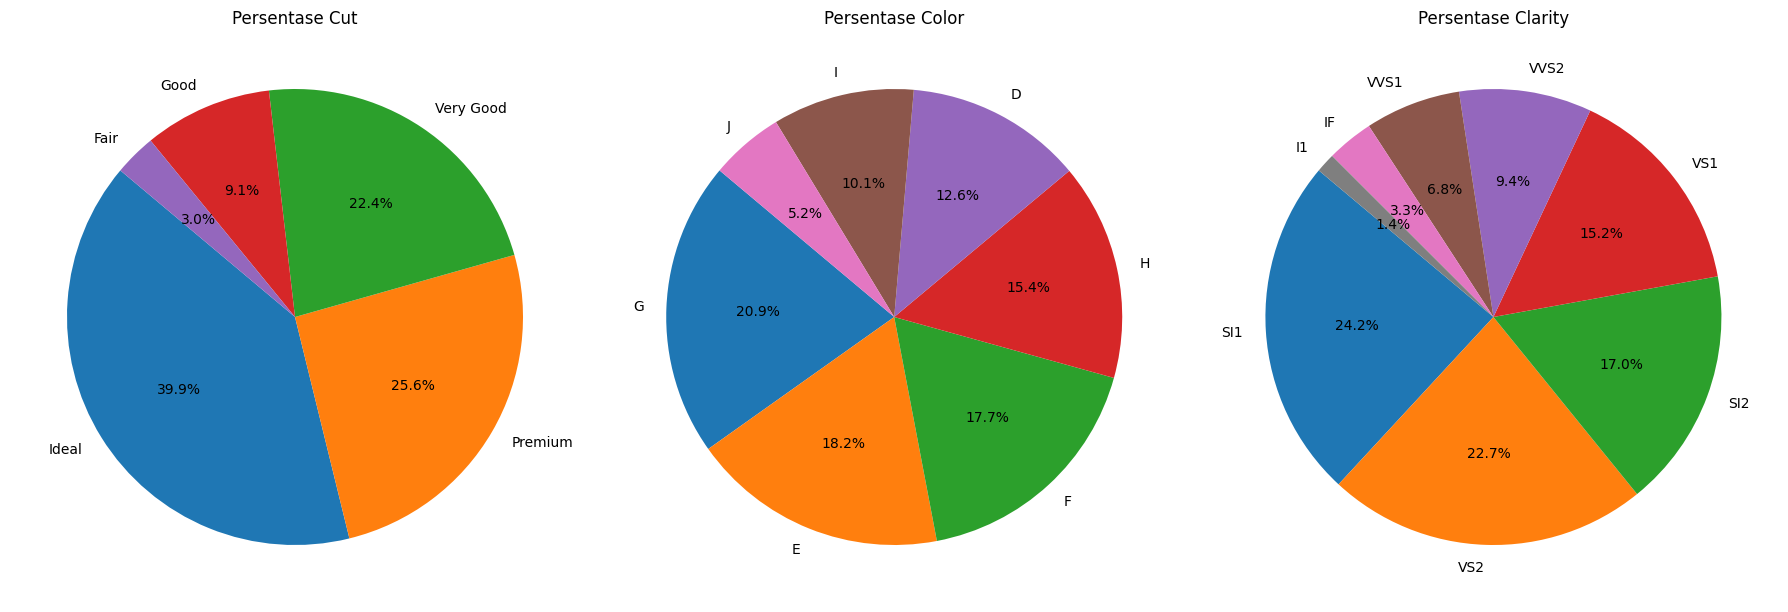

In [34]:
# Data presentase masing masing type data object
cut_percentage = data_clean['cut'].value_counts(normalize=True) * 100
color_percentage = data_clean['color'].value_counts(normalize=True) * 100
clarity_percentage = data_clean['clarity'].value_counts(normalize=True) * 100

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# cut
axs[0].pie(cut_percentage, labels=cut_percentage.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Persentase Cut')

# color
axs[1].pie(color_percentage, labels=color_percentage.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Persentase Color')

# clarity
axs[2].pie(clarity_percentage, labels=clarity_percentage.index, autopct='%1.1f%%', startangle=140)
axs[2].set_title('Persentase Clarity')

plt.tight_layout()
plt.show()

**Hasil visualisasi type data object**


1.   cut (Ideal, Premium, Very Good, Good, Fair): Kualitas potongan. Semakin presisi potongan berlian, semakin baik berlian tersebut, sehingga memiliki grade yang tinggi.
2.   color : warna berlian, berdasarkan data diatas urutan warna berlian = G, E, F, H, D, I, dan J.
3.   clarity : merupakan tingkatan kejernihan berlian. dengan data object (SI1, VS2, SI2, VS1, VVS2, VVS1, IF, I1)

Dari analysis diatas maka dapat disimpulkan bahawa type data object mempunyai categorikal urutan data.

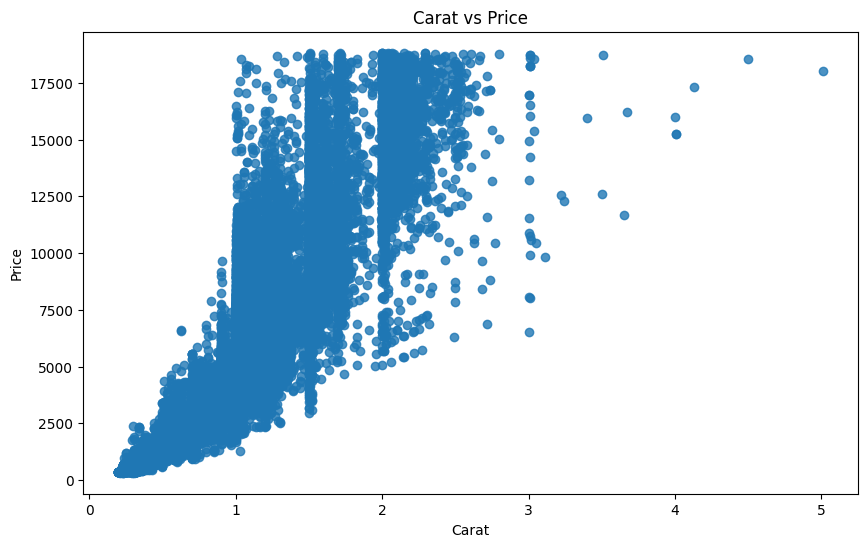

In [35]:
# Scatter plot untuk price vs carat
# Semakin berat carrat semakin mempengaruhi price diamond
plt.figure(figsize=(10, 6))
plt.scatter(data_clean['carat'], data_clean['price'], alpha=0.8)
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Carat vs Price')
plt.show()

In [36]:
# Merupakan sebaran variabel dalam bentuk visualisasi hubungan antar variabel
#sns.pairplot(data_clean, hue="cut", palette=cols)
#plt.show()

In [37]:
# Merupakan sebaran variabel dalam bentuk visualisasi hubungan antar variabel
#sns.pairplot(data_clean, palette=cols)
#plt.show()

1.   Dari visualisasi diatas dapat disimpulkan terdapat beberapa outliers (titik yang jauh) yang perlu ditangani karena bisa mempengaruhi data
2.   Dikarenakan terdapat outliers perlu dilakukan pengolahan data bersama team
3.   melakukan pengecekan variabel target yaitu price




<Axes: xlabel='price', ylabel='Count'>

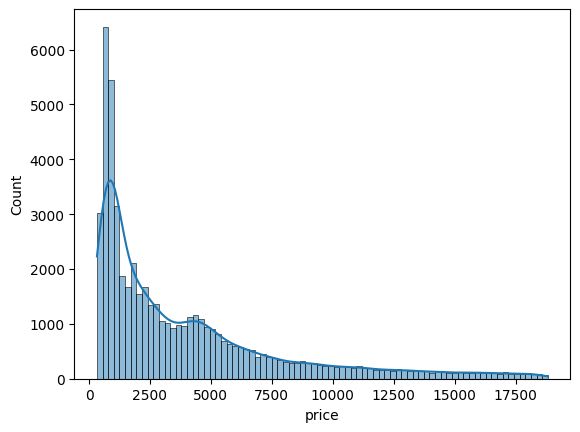

In [38]:
# Melihat Distribusi
# Merupakan coloms target
sns.histplot(data_clean['price'], kde=True)

In [39]:
# Menghitung nilai skewness dan kurtosisi
# skewness: ukuran statistik yang digunakan untuk mengukur sejauh mana distribusi data cenderung miring
# Kurtosis: ukuran statistik yang digunakan untuk mengukur sejauh mana distribusi data cenderung
# memiliki ekor panjang (outliers) dan puncak tajam (peakedness) dibandingkan dengan distribusi normal
# Skewness miring kekanan menjukan bahwa data lebih banyak nilai yang tinggi dibandingkan mean
# skewness =0 merupakan data simetris
# Kurtosis >0 merupakan distribusi tinggi dan lebih ramping dari normal
# kurtosis = 0 merupakan distribusi normal
print (f"Skewness : {data_clean['price'].skew()}")
print (f"Kurtosis : {data_clean['price'].kurt()}")

Skewness : 1.618239898265432
Kurtosis : 2.1784530585226896


In [40]:
print (f"Skewness x : {data_clean['panjang_berlian'].skew()}")
print (f"Skewness y : {data_clean['lebar_berlian'].skew()}")
print (f"Skewness z : {data_clean['kedalaman_berlian'].skew()}")

Skewness x : 0.37962390611337177
Skewness y : 2.4457680214087554
Skewness z : 1.5290234285039366


<Axes: xlabel='panjang_berlian', ylabel='price'>

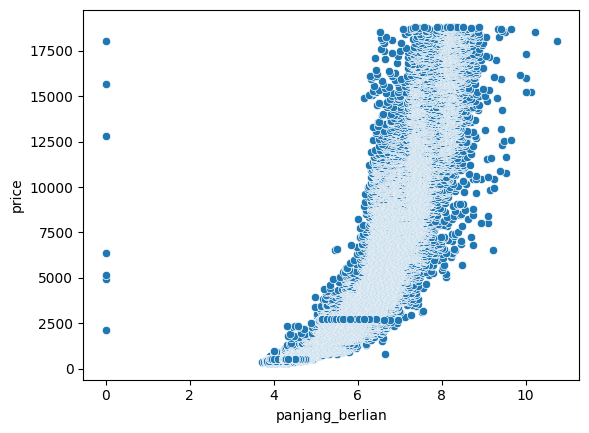

In [41]:
# Melakukan pengecekan outliers data berdasarkan colom "panjang berlian" berdasarkan price
# Kesimpulan dari hasil visualization ialah tidak ada berlian yang tidak memiliki nilai panjang
sns.scatterplot(x=data_clean['panjang_berlian'], y=data_clean['price'])

In [42]:
# Melihat data berdasarkan columns yang bernilai 0.0
data_clean[data_clean['panjang_berlian']==0.0]

,carat,cut,color,clarity,depth,table,price,panjang_berlian,lebar_berlian,kedalaman_berlian
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


<Axes: xlabel='lebar_berlian', ylabel='price'>

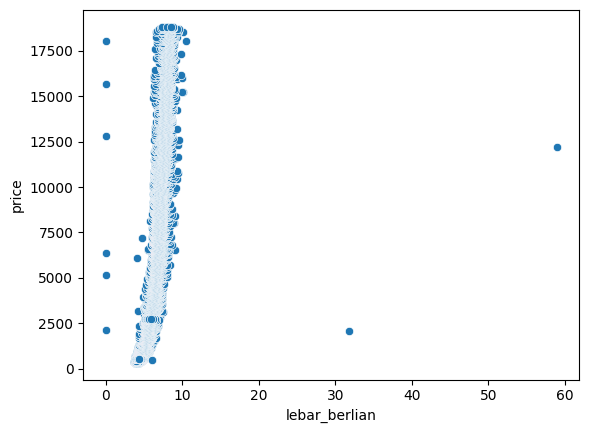

In [43]:
# Tidak ada berlian yang tidak memiliki ukuran lebar berlian
sns.scatterplot(x=data_clean['lebar_berlian'], y=data_clean['price'])

In [44]:
data_clean[data_clean['lebar_berlian']==0.0]

,carat,cut,color,clarity,depth,table,price,panjang_berlian,lebar_berlian,kedalaman_berlian
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


<Axes: xlabel='kedalaman_berlian', ylabel='price'>

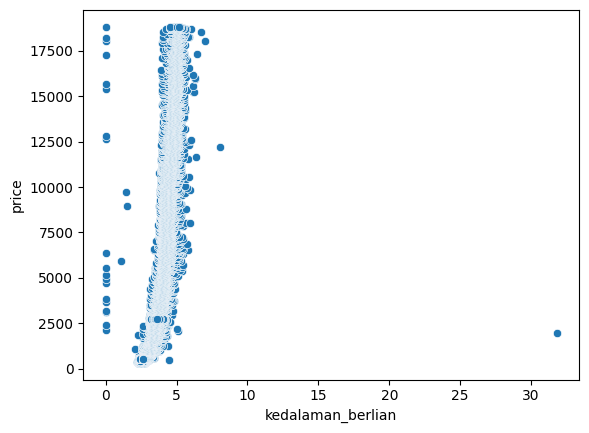

In [45]:
# Tidak ada berlian yang tidak memiliki ukuran kedalaman berlian
sns.scatterplot(x=data_clean['kedalaman_berlian'], y=data_clean['price'])

In [46]:
data_clean[data_clean['kedalaman_berlian']==0.0]

,carat,cut,color,clarity,depth,table,price,panjang_berlian,lebar_berlian,kedalaman_berlian
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


Setelah melakukan pengecekan outliers data ternyata terdapat outliers data dengan nilai 0 dan terdapat nilai 30 dan 60 menunjukan data tidak normal, maka keputusan yang diambil ialah melakukan drop data untuk mengatasi hal tersebut.

catatan selanjutnya ialah terdapat beberapa bias yang dapat membuat model tidak efektif ialah y dan z yang tidak sesuai ukuran value rows

In [47]:
data_out = data_clean.copy()
data_out

,carat,cut,color,clarity,depth,table,price,panjang_berlian,lebar_berlian,kedalaman_berlian
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [48]:
data_out.drop(data_out.loc[(data_out['panjang_berlian']==0.0)|(data_out['lebar_berlian']==0.0)|(data_out['kedalaman_berlian']==0.0)|(data_out['lebar_berlian']
>30)|(data_out['kedalaman_berlian']>30)].index,inplace=True)
data_out

,carat,cut,color,clarity,depth,table,price,panjang_berlian,lebar_berlian,kedalaman_berlian
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [49]:
# Skewness : distribusi normal
print (f"Skewness x : {data_out['panjang_berlian'].skew()}")
print (f"Skewness y : {data_out['lebar_berlian'].skew()}")
print (f"Skewness z : {data_out['kedalaman_berlian'].skew()}")

Skewness x : 0.3968417687018591
Skewness y : 0.39133039911814904
Skewness z : 0.3916756922614983


<Axes: xlabel='carat', ylabel='price'>

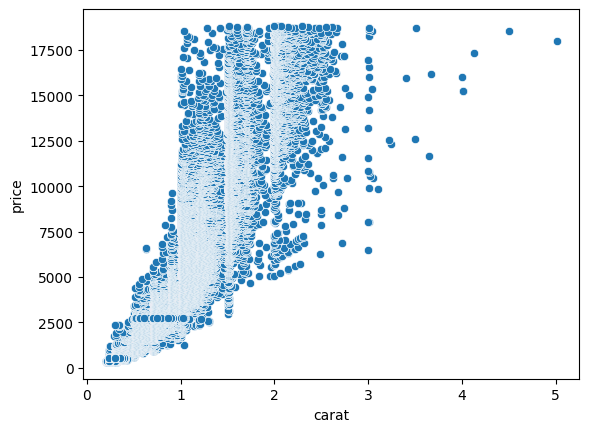

In [50]:
# carat (0.2-5.01)
# Insight : Seiring meningkatnya carat dapat meningkat juga harga
sns.scatterplot(x=data_out['carat'], y=data_out['price'])

<Axes: xlabel='depth', ylabel='price'>

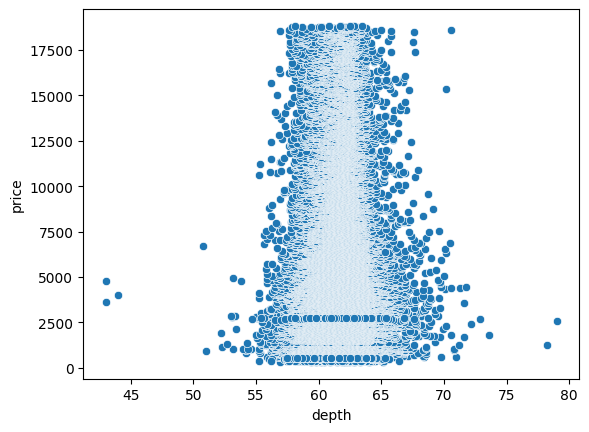

In [51]:
# depth (43-79)
sns.scatterplot(x=data_out['depth'], y=data_out['price'])

<Axes: xlabel='table', ylabel='price'>

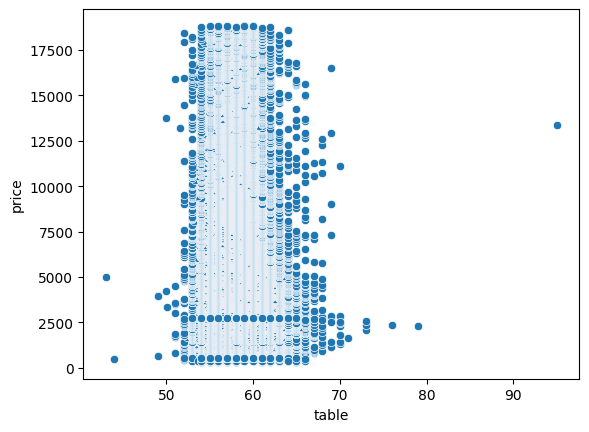

In [52]:
# terdapat outliers
sns.scatterplot(x=data_out['table'], y=data_out['price'])

In [53]:
# melakukan penyaringan data berdasarkan colom dept dan tabel
data_out = data_out[(data_out["depth"] < 75) & (data_out["depth"] > 45)]
data_out = data_out[(data_out["table"] < 75) & (data_out["table"] > 48)]

In [54]:
data_out

,carat,cut,color,clarity,depth,table,price,panjang_berlian,lebar_berlian,kedalaman_berlian
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [55]:
df_pro = data_out.copy()
df_pro

,carat,cut,color,clarity,depth,table,price,panjang_berlian,lebar_berlian,kedalaman_berlian
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [56]:
df_pro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53762 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   carat              53762 non-null  float64
 1   cut                53762 non-null  object 
 2   color              53762 non-null  object 
 3   clarity            53762 non-null  object 
 4   depth              53762 non-null  float64
 5   table              53762 non-null  float64
 6   price              53762 non-null  int64  
 7   panjang_berlian    53762 non-null  float64
 8   lebar_berlian      53762 non-null  float64
 9   kedalaman_berlian  53762 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


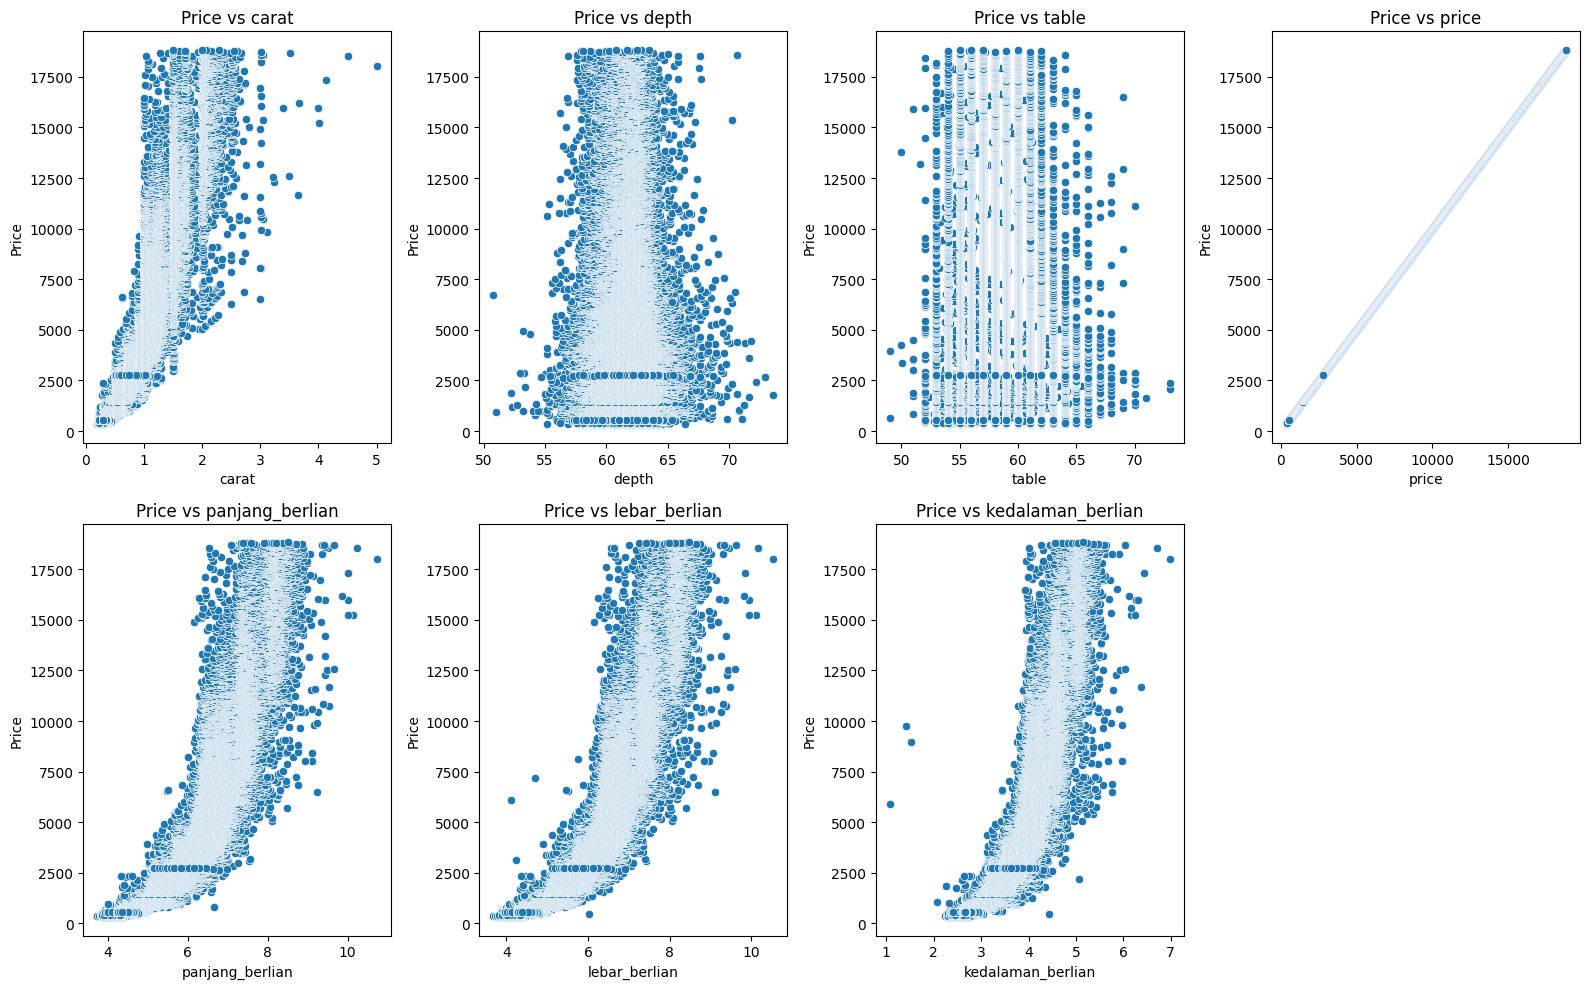

In [57]:
# Melakukan visualisasi type colom numerik setelah melakukan pengecekan dan pengolahan outliers data
numeric_cols = ['carat', 'depth', 'table', 'price', 'panjang_berlian', 'lebar_berlian', 'kedalaman_berlian']

plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 4, i + 1)  # 2, 4 untuk menyesuaikan jumlah kolom numerik
    sns.scatterplot(x=col, y='price', data=df_pro, palette=None)
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [58]:
# Setelah pengolahan data data outliers
sns.pairplot(df_pro, hue="cut", palette=cols)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [59]:
# Untuk melihat matriks korelasi type data numerik
corr_matrix = df_pro.select_dtypes(include='number').corr()
corr_matrix

,carat,depth,table,price,panjang_berlian,lebar_berlian,kedalaman_berlian
carat,1.000000,0.028707,0.181372,0.921553,0.977859,0.976946,0.976555
depth,0.028707,1.000000,-0.303842,-0.010730,-0.024656,-0.027766,0.097337
table,0.181372,-0.303842,1.000000,0.126717,0.195925,0.189770,0.155314
price,0.921553,-0.010730,0.126717,1.000000,0.887126,0.888715,0.882036
panjang_berlian,0.977859,-0.024656,0.195925,0.887126,1.000000,0.998655,0.991123
lebar_berlian,0.976946,-0.027766,0.189770,0.888715,0.998655,1.000000,0.990784
kedalaman_berlian,0.976555,0.097337,0.155314,0.882036,0.991123,0.990784,1.000000


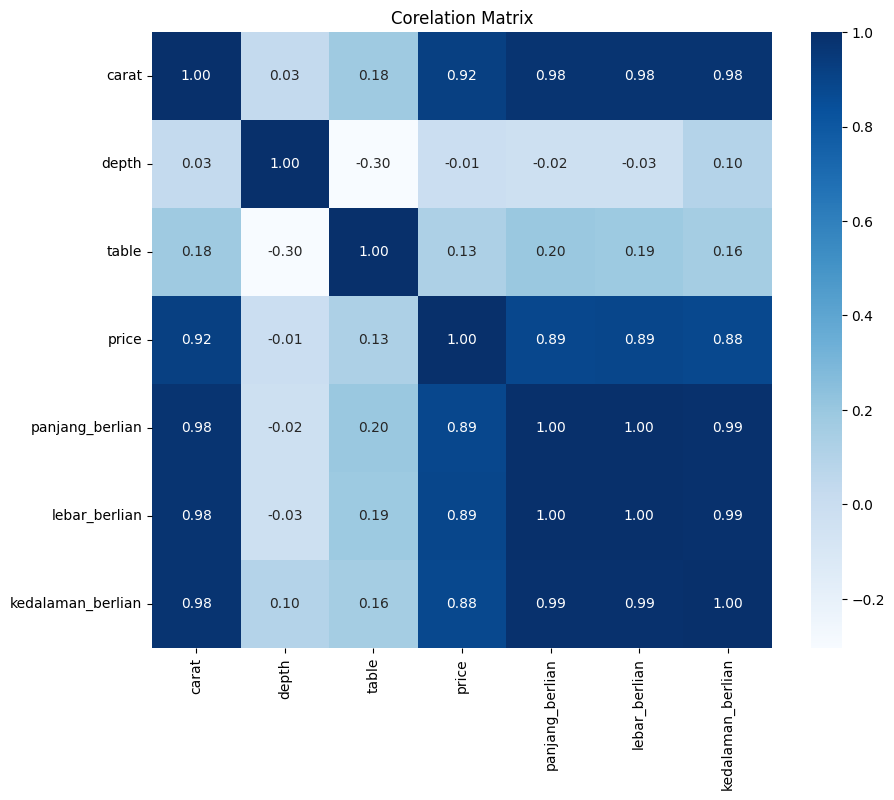

In [60]:
# kemudian melihat korelasi antar variabel
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, fmt='.2f')
plt.title('Corelation Matrix')
plt.show()

Dari tabel diatas maka interpretasi ialah terdapat beberapa kolom yang mempunya hubungan korelasi sangat kuat (positif korelasi) namun ada yang memmpunyai hubungan korelasi lemah.
1. Identifikasi hubungan korelasi kuat :
*   carat vs price : 0.92 > semakin berat carat semakin mahal berlian tersebut
*   panjang berlian vs price 0.89
*   lebar_berlian vs price 0.89
*   kedalaman_berlian vs price 0.88
2. Identifikasi hubungan korelasi remah
*   depth vs price -0.01 : korelasi lemah
3. Korelasi sedang
*   table vs price 0.13







In [61]:
hig_corr = df_pro.select_dtypes(include='number').corr()
col_corr = hig_corr['price']
print(col_corr)

carat                0.921553
depth               -0.010730
table                0.126717
price                1.000000
panjang_berlian      0.887126
lebar_berlian        0.888715
kedalaman_berlian    0.882036
Name: price, dtype: float64


In [62]:
df_pro['price'].min()

326

In [63]:
df_pro['price'].std()

3985.949793040151

In [64]:
df_pro['price'].max()

18823

In [65]:
df_pro['price'].mean()

3931.128120233622

In [66]:
df_pro['price'].median()

2401.0

# 4.&nbsp;PreProcessing

In [67]:
df_diamond = df_pro.copy()

In [68]:
df_diamond

,carat,cut,color,clarity,depth,table,price,panjang_berlian,lebar_berlian,kedalaman_berlian
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [69]:
df_diamond.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53762 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   carat              53762 non-null  float64
 1   cut                53762 non-null  object 
 2   color              53762 non-null  object 
 3   clarity            53762 non-null  object 
 4   depth              53762 non-null  float64
 5   table              53762 non-null  float64
 6   price              53762 non-null  int64  
 7   panjang_berlian    53762 non-null  float64
 8   lebar_berlian      53762 non-null  float64
 9   kedalaman_berlian  53762 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [70]:
df_diamond['price'].describe()

count    53762.000000
mean      3931.128120
std       3985.949793
min        326.000000
25%        950.250000
50%       2401.000000
75%       5324.000000
max      18823.000000
Name: price, dtype: float64

In [71]:
# Tidak terdistribusi normal
# Jarak data bervariasi dapat disimpulkan bisa penggunaan Robust scaler nantinya
df_diamond.describe(percentiles = {0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99}).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
carat,53762.0,0.797495,0.473153,0.20,0.30,0.40,0.70,1.04,1.51,1.70,2.17,5.01
depth,53762.0,61.748505,1.418914,50.80,59.30,61.00,61.80,62.50,63.30,63.80,65.60,73.60
table,53762.0,57.456880,2.221381,49.00,54.00,56.00,57.00,59.00,60.00,61.00,64.00,73.00
price,53762.0,3931.128120,3985.949793,326.00,544.00,950.25,2401.00,5324.00,9813.00,13094.85,17365.39,18823.00
panjang_berlian,53762.0,5.731510,1.118599,3.73,4.29,4.71,5.70,6.54,7.30,7.66,8.35,10.74
lebar_berlian,53762.0,5.733413,1.110507,3.68,4.30,4.72,5.71,6.54,7.30,7.64,8.33,10.54
kedalaman_berlian,53762.0,3.539254,0.691068,1.07,2.65,2.91,3.53,4.03,4.52,4.73,5.15,6.98


In [72]:
diamonds = df_diamond.copy()
diamonds

,carat,cut,color,clarity,depth,table,price,panjang_berlian,lebar_berlian,kedalaman_berlian
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# 5.&nbsp;Feature Engineering
## Label Encoding

In [73]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53762 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   carat              53762 non-null  float64
 1   cut                53762 non-null  object 
 2   color              53762 non-null  object 
 3   clarity            53762 non-null  object 
 4   depth              53762 non-null  float64
 5   table              53762 non-null  float64
 6   price              53762 non-null  int64  
 7   panjang_berlian    53762 non-null  float64
 8   lebar_berlian      53762 non-null  float64
 9   kedalaman_berlian  53762 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [74]:
diamonds

,carat,cut,color,clarity,depth,table,price,panjang_berlian,lebar_berlian,kedalaman_berlian
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [75]:
for col in diamonds.columns:
    if diamonds[col].dtype == 'object':
        unique_values = diamonds[col].unique()
        print(f"Unique values in {col}: {unique_values}")

Unique values in cut: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Unique values in color: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Unique values in clarity: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


Berdasarkan keterangan atribut colom maka akan dilakukan konvensi type data "object" atau data kategorikal ke ordinal numerik

In [76]:
object_colm = diamonds.select_dtypes(include = ['object']).columns.to_list()
object_colm

['cut', 'color', 'clarity']

In [77]:
object_colm = ['cut', 'color', 'clarity']
encoders = {}

for c in object_colm:
  label_encoder = LabelEncoder()
  label_encoder.fit(list(diamonds[c].values)) #encoders data untuk mempelajari dataset
  diamonds[c] = label_encoder.transform(list(diamonds[c].values)) # encoder proses perubahan data
  encoders [c] = label_encoder

In [107]:
encoder_file_path = '/content/drive/MyDrive/Digital Skola/FINAL PROJECT/process/encoders.pkl'

# Simpan encoders menggunakan pickle
with open(encoder_file_path, 'wb') as file:
    pickle.dump(encoders, file)

Setelah Label encoders maka urutan :
Urutan Setelah Label Encoders :
*   cut (Ideal = 2 , Premium = 3, Very Good = 4, Good = 1, Fair = 0)
*   color (G = 3, E = 1, F = 2, H = 4, D = 0, I = 5, dan J = 6)
*   clarity (SI1 = 2 , VS2 = 5, SI2 = 3, VS1 = 4, VVS2 = 7, VVS1 = 6, IF = 1, I1 = 0 )

In [78]:
for col in diamonds.columns:
    if diamonds[col].dtype == 'int64':
        unique_values = diamonds[col].unique()
        print(f"Unique values in {col}: {unique_values}")

Unique values in cut: [2 3 1 4 0]
Unique values in color: [1 5 6 4 2 3 0]
Unique values in clarity: [3 2 4 5 7 6 0 1]
Unique values in price: [ 326  327  334 ... 2753 2755 2756]


In [79]:
for col in df_diamond.columns:
    if df_diamond[col].dtype == 'object':
        unique_values = df_diamond[col].unique()
        print(f"Unique values in {col}: {unique_values}")

Unique values in cut: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Unique values in color: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Unique values in clarity: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


## Split Train Testing

In [80]:
diamonds_split = diamonds.copy()
diamonds_split

,carat,cut,color,clarity,depth,table,price,panjang_berlian,lebar_berlian,kedalaman_berlian
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [81]:
diamonds_split.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53762 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   carat              53762 non-null  float64
 1   cut                53762 non-null  int64  
 2   color              53762 non-null  int64  
 3   clarity            53762 non-null  int64  
 4   depth              53762 non-null  float64
 5   table              53762 non-null  float64
 6   price              53762 non-null  int64  
 7   panjang_berlian    53762 non-null  float64
 8   lebar_berlian      53762 non-null  float64
 9   kedalaman_berlian  53762 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.5 MB


In [82]:
X = diamonds_split.drop(['price'], axis = 1)
y = diamonds_split['price']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2, # use 0.1 if data is huge.# 80% dataset gunkan sbg data training, 20% dataset untuk testing
                                                    random_state = 0) # agar hasil rerun tetap sama
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(43009, 9) (10753, 9) (43009,) (10753,)


## Feature Scaling

In [84]:
RS_X = RobustScaler()
# Melakukan fit dan transform pada data training
X_train_scale = RS_X.fit_transform(X_train)
# Melakukan transform pada data testing
X_test_scale = RS_X.transform(X_test)

In [108]:
scaler_file_path = '/content/drive/MyDrive/Digital Skola/FINAL PROJECT/process/robust_scaler.pkl'

# Simpan scaler menggunakan pickle
with open(scaler_file_path, 'wb') as file:
    pickle.dump(RS_X, file)

# 6.&nbsp;Modeling

### KFold and Evaluation Score

In [85]:
models = {
     "Linear Regression": LinearRegression(),
     "Lasso Regression": Lasso(alpha=1e-4),
     "Support Vector Regression": SVR(kernel='rbf', C=1.0, epsilon=0.1),
     "XGBRegressor": xgboost.XGBRegressor(objective='reg:squarederror', random_state=42),
     "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
     "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
     "KNeighbors Regressor": KNeighborsRegressor(n_neighbors=5),
     "CatBoost Regressor": CatBoostRegressor(verbose=0, random_state=42),
     "LGBM Regressor": LGBMRegressor(random_state=42),
     "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
     "AdaBoost Regressor": AdaBoostRegressor(random_state=42)
 }

In [86]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error
from joblib import Parallel, delayed


scorers = {
    'r2': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error),
    'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))
}


def test_model(model, X_train_scale, y_train, cv):
    scores = cross_validate(model, X_train_scale, y_train, cv=cv, scoring=scorers)
    r2 = scores['test_r2'].mean()
    mae = scores['test_mae'].mean()
    rmse = scores['test_rmse'].mean()
    return r2, mae, rmse

# validasi silang secara paralel
cv = KFold(n_splits=5, shuffle=True, random_state=45)  # Menggunakan 5 lipatan untuk komputasi yang lebih cepat

results = Parallel(n_jobs=-1)(delayed(test_model)(model, X_train_scale, y_train, cv) for name, model in models.items())

# Kumpulkan hasilnya
model_train_perf = {}
for (name, _), (r2, mae, rmse) in zip(models.items(), results):
    model_train_perf[name] = {'R-squared': r2, 'MAE': mae, 'RMSE': rmse}

model_train_perf_df = pd.DataFrame(model_train_perf)
model_train_perf_df

,Linear Regression,Lasso Regression,Support Vector Regression,XGBRegressor,Decision Tree Regressor,Random Forest Regressor,KNeighbors Regressor,CatBoost Regressor,LGBM Regressor,Gradient Boosting Regressor,AdaBoost Regressor
R-squared,0.886043,0.886019,0.462877,0.980665,0.964234,0.981031,0.948164,0.982503,0.981409,0.971631,0.890290
MAE,857.353680,856.878697,1465.757530,281.618319,369.662279,273.168595,457.527221,272.513548,286.629128,365.882311,993.189738
RMSE,1342.955683,1343.096832,2917.503762,553.539736,752.728755,548.264507,906.167976,526.560558,542.763655,670.389576,1318.028213


In [88]:
model_train_perf_df = pd.DataFrame(model_train_perf).T
sorted_model_train_perf_df = model_train_perf_df.sort_values(by=['R-squared', 'MAE', 'RMSE'], ascending=[False, True, True])
sorted_model_train_perf_df

,R-squared,MAE,RMSE
CatBoost Regressor,0.982503,272.513548,526.560558
LGBM Regressor,0.981409,286.629128,542.763655
Random Forest Regressor,0.981031,273.168595,548.264507
XGBRegressor,0.980665,281.618319,553.539736
Gradient Boosting Regressor,0.971631,365.882311,670.389576
Decision Tree Regressor,0.964234,369.662279,752.728755
KNeighbors Regressor,0.948164,457.527221,906.167976
AdaBoost Regressor,0.890290,993.189738,1318.028213
Linear Regression,0.886043,857.353680,1342.955683
Lasso Regression,0.886019,856.878697,1343.096832


### Model Hyper-Parameter Tuning

In [90]:
cbr_models = CatBoostRegressor(verbose=0, random_state=42)

# Definisikan parameter grid
param_grid_cb = {
    'iterations': [100, 200, 300],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Buat GridSearchCV
grid_search_cb = GridSearchCV(estimator=cbr_models,
                              param_grid=param_grid_cb,
                              cv=KFold(n_splits=5, shuffle=True, random_state=45),
                              scoring={'r2': 'r2', 'mae': 'neg_mean_absolute_error', 'rmse': 'neg_mean_squared_error'},
                              refit='r2',
                              n_jobs=-1,
                              verbose=2)

grid_search_cb.fit(X_train_scale, y_train)

# Cetak hasil terbaik
print("Best parameters CatBoost Regressor:", grid_search_cb.best_params_)
print("R-squared score for CatBoost Regressor:", grid_search_cb.best_score_)
print("MAE score for CatBoost Regressor:", -grid_search_cb.cv_results_['mean_test_mae'][grid_search_cb.best_index_])
print("RMSE score for CatBoost Regressor:", np.sqrt(-grid_search_cb.cv_results_['mean_test_rmse'][grid_search_cb.best_index_]))
best_cb_model = grid_search_cb.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters CatBoost Regressor: {'depth': 8, 'iterations': 300, 'learning_rate': 0.1}
R-squared score for CatBoost Regressor: 0.9823592508905679
MAE score for CatBoost Regressor: 277.5574947101205
RMSE score for CatBoost Regressor: 528.7478889544684


In [98]:
lgbm_models = LGBMRegressor(random_state=42)

param_grid_lgbm = {
    'num_leaves': [20, 30, 40],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search_lgbm = GridSearchCV(estimator=lgbm_models,
                                 param_grid=param_grid_lgbm,
                                 cv=KFold(n_splits=5, shuffle=True, random_state=45),
                                 scoring={'r2': 'r2', 'mae': 'neg_mean_absolute_error', 'rmse': 'neg_mean_squared_error'},
                                 refit='r2',
                                 n_jobs=-1,
                                 verbose=2)


grid_search_lgbm.fit(X_train_scale, y_train)


print("Best parameters LGBM Regressor:", grid_search_lgbm.best_params_)
print("R-squared score for LGBM Regressor:", grid_search_lgbm.best_score_)
print("MAE score for LGBM Regressor:", grid_search_lgbm.cv_results_['mean_test_mae'][grid_search_lgbm.best_index_])
print("RMSE score for LGBM Regressor:", np.sqrt(-grid_search_lgbm.cv_results_['mean_test_rmse'][grid_search_lgbm.best_index_]))
lgbm_tuned = grid_search_lgbm.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1277
[LightGBM] [Info] Number of data points in the train set: 43009, number of used features: 9
[LightGBM] [Info] Start training from score 3937.486549
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best parameters LGBM Regressor: {'learning_rate': 0.1, 'max_depth': 10, 'num_leaves': 40}
R-squared score for LGBM Regressor: 0.9815641156926092
MAE score for LGBM Regressor: -282.9192560966753
RMSE score for LGBM Regressor: 540.5592279419799


In [100]:
rfr_models = RandomForestRegressor(n_estimators=100, random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 6, 10, 15],
    'min_samples_split': [2, 5, 10]
}


grid_search_rf = GridSearchCV(estimator=rfr_models,
                              param_grid=param_grid_rf,
                              cv=KFold(n_splits=5, shuffle=True, random_state=45),
                              scoring={'r2': 'r2', 'mae': 'neg_mean_absolute_error', 'rmse': 'neg_mean_squared_error'},
                              refit='r2',
                              n_jobs=-1,
                              verbose=2)

grid_search_rf.fit(X_train_scale, y_train)


print("Best parameters RandomForestRegressor:", grid_search_rf.best_params_)
print("R-squared score for RandomForestRegressor:", grid_search_rf.best_score_)
print("MAE score for RandomForestRegressor:", grid_search_rf.cv_results_['mean_test_mae'][grid_search_rf.best_index_])
print("RMSE score for RandomForestRegressor:", np.sqrt(-grid_search_rf.cv_results_['mean_test_rmse'][grid_search_rf.best_index_]))
rfr_tuned = grid_search_rf.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters RandomForestRegressor: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 300}
R-squared score for RandomForestRegressor: 0.9813607543658032
MAE score for RandomForestRegressor: -273.42085965038353
RMSE score for RandomForestRegressor: 543.5665722840105


In [99]:
xgb_models = xgboost.XGBRegressor(objective='reg:squarederror', random_state=42)


param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}


grid_search_xgb = GridSearchCV(estimator=xgb_models,
                               param_grid=param_grid_xgb,
                               cv=KFold(n_splits=5, shuffle=True, random_state=45),
                               scoring={'r2': 'r2', 'mae': 'neg_mean_absolute_error', 'rmse': 'neg_mean_squared_error'},
                               refit='r2',
                               n_jobs=-1,
                               verbose=2)


grid_search_xgb.fit(X_train_scale, y_train)

print("Best parameters XGBRegressor:", grid_search_xgb.best_params_)
print("R-squared score for XGBRegressor:", grid_search_xgb.best_score_)
print("MAE score for XGBRegressor:", grid_search_xgb.cv_results_['mean_test_mae'][grid_search_xgb.best_index_])
print("RMSE score for XGBRegressor:", np.sqrt(-grid_search_xgb.cv_results_['mean_test_rmse'][grid_search_xgb.best_index_]))
xgb_tuned = grid_search_xgb.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters XGBRegressor: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}
R-squared score for XGBRegressor: 0.9818343301428539
MAE score for XGBRegressor: -270.65683184353765
RMSE score for XGBRegressor: 536.6265530911685


In [101]:
tuning_results = {
    'Model': ['CatBoost Regressor', 'LGBM Regressor', 'Random Forest Regressor', 'XGBRegressor'],
    'Best Parameters': [grid_search_cb.best_params_, grid_search_lgbm.best_params_, grid_search_rf.best_params_, grid_search_xgb.best_params_],
    'R-squared': [grid_search_cb.best_score_, grid_search_lgbm.best_score_, grid_search_rf.best_score_, grid_search_xgb.best_score_],
    'MAE': [grid_search_cb.cv_results_['mean_test_mae'][grid_search_cb.best_index_], grid_search_lgbm.cv_results_['mean_test_mae'][grid_search_lgbm.best_index_], grid_search_rf.cv_results_['mean_test_mae'][grid_search_rf.best_index_], grid_search_xgb.cv_results_['mean_test_mae'][grid_search_xgb.best_index_]],
    'RMSE': [np.sqrt(-grid_search_cb.cv_results_['mean_test_rmse'][grid_search_cb.best_index_]), np.sqrt(-grid_search_lgbm.cv_results_['mean_test_rmse'][grid_search_lgbm.best_index_]), np.sqrt(-grid_search_rf.cv_results_['mean_test_rmse'][grid_search_rf.best_index_]), np.sqrt(-grid_search_xgb.cv_results_['mean_test_rmse'][grid_search_xgb.best_index_])]
}

df = pd.DataFrame(tuning_results)
print(df)

                     Model                                    Best Parameters  \
0       CatBoost Regressor  {'depth': 8, 'iterations': 300, 'learning_rate...   
1           LGBM Regressor  {'learning_rate': 0.1, 'max_depth': 10, 'num_l...   
2  Random Forest Regressor  {'max_depth': 15, 'min_samples_split': 2, 'n_e...   
3             XGBRegressor  {'learning_rate': 0.1, 'max_depth': 8, 'n_esti...   

   R-squared         MAE        RMSE  
0   0.982359 -277.557495  528.747889  
1   0.981564 -282.919256  540.559228  
2   0.981361 -273.420860  543.566572  
3   0.981834 -270.656832  536.626553  


In [102]:
df

,Model,Best Parameters,R-squared,MAE,RMSE
0,CatBoost Regressor,"{'depth': 8, 'iterations': 300, 'learning_rate...",0.982359,-277.557495,528.747889
1,LGBM Regressor,"{'learning_rate': 0.1, 'max_depth': 10, 'num_l...",0.981564,-282.919256,540.559228
2,Random Forest Regressor,"{'max_depth': 15, 'min_samples_split': 2, 'n_e...",0.981361,-273.420860,543.566572
3,XGBRegressor,"{'learning_rate': 0.1, 'max_depth': 8, 'n_esti...",0.981834,-270.656832,536.626553


## Model Training Evaluation

In [120]:
import pickle
import os

models_tuning = [
    ('cbr_models', best_cb_model),
    ('lgbm_models', lgbm_tuned),
    ('rfr_models', rfr_tuned),
    ('xgb_models', xgb_tuned),
]

file_path = '/content/drive/MyDrive/Digital Skola/FINAL PROJECT/'

os.makedirs(file_path, exist_ok=True)

for model_name, model in models_tuning:

    file_pathtuning = f"{file_path}{model_name}_model_tuning.pkl"


    with open(file_pathtuning, 'wb') as file:
        pickle.dump(model, file)

## Train dataset

In [110]:
def load_model(file_path):
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
    return model

def evaluate_model(model, X_train_scale, y_train):
    y_train_pred = model.predict(X_train_scale)
    r2 = r2_score(y_train, y_train_pred)
    mae = mean_absolute_error(y_train, y_train_pred)
    rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    return r2, mae, rmse

file_path = 'content/drive/MyDrive/Digital Skola/FINAL PROJECT/'
model_names = ['cbr_models', 'lgbm_models', 'rfr_models', 'xgb_models']


train_r2 = {}
train_mae = {}
train_rmse = {}

for model_name in model_names:
    file_pathtuning = f"{file_path}{model_name}_model_tuning.pkl"
    model = load_model(file_pathtuning)

    r2_train, mae_train, rmse_train = evaluate_model(model, X_train_scale, y_train)
    train_r2[model_name] = r2_train
    train_mae[model_name] = mae_train
    train_rmse[model_name] = rmse_train

print("Hasil Evaluasi pada Data Training:")
print("R-squared:\n", train_r2)
print("MAE:\n", train_mae)
print("RMSE:\n", train_rmse)

Hasil Evaluasi pada Data Training:
R-squared:
 {'cbr_models': 0.987315036570381, 'lgbm_models': 0.986427025937023, 'rfr_models': 0.9944775281488959, 'xgb_models': 0.9912169363172976}
MAE:
 {'cbr_models': 252.56932222118385, 'lgbm_models': 256.8002938862372, 'rfr_models': 155.80400819712256, 'xgb_models': 207.71342775963544}
RMSE:
 {'cbr_models': 448.3667844677104, 'lgbm_models': 463.7952878667494, 'rfr_models': 295.8391035126889, 'xgb_models': 373.088478963301}


In [112]:
df_evalmodel_train = pd.DataFrame({
    'Model': model_names,
    'R-squared': list(train_r2.values()),
    'MAE': list(train_mae.values()),
    'RMSE': list(train_rmse.values())
})
df_evalmodel_train.sort_values(by = ['R-squared', 'MAE', 'RMSE'], ascending = [False, True, True])


,Model,R-squared,MAE,RMSE
2,rfr_models,0.994478,155.804008,295.839104
3,xgb_models,0.991217,207.713428,373.088479
0,cbr_models,0.987315,252.569322,448.366784
1,lgbm_models,0.986427,256.800294,463.795288


## Data Test

In [113]:
test_r2 = {}
test_mae = {}
test_rmse = {}

for model_name in model_names:

    file_path_tuning = f"{file_path}{model_name}_model_tuning.pkl"
    model = load_model(file_path_tuning)

    r2_test, mae_test, rmse_test = evaluate_model(model, X_test_scale, y_test)
    test_r2[model_name] = r2_test
    test_mae[model_name] = mae_test
    test_rmse[model_name] = rmse_test

print("Hasil Evaluasi pada Data Test:")
print("R-squared:\n", test_r2)
print("MAE:\n", test_mae)
print("RMSE:\n", test_rmse)

Hasil Evaluasi pada Data Test:
R-squared:
 {'cbr_models': 0.9821764997542332, 'lgbm_models': 0.9815529663760812, 'rfr_models': 0.9808829070875792, 'xgb_models': 0.9812587407885561}
MAE:
 {'cbr_models': 281.14387528880883, 'lgbm_models': 283.9847167906859, 'rfr_models': 275.64507272302507, 'xgb_models': 272.3937366435575}
RMSE:
 {'cbr_models': 534.7561212230103, 'lgbm_models': 544.0296077744597, 'rfr_models': 553.8219848435202, 'xgb_models': 548.3510129168387}


In [114]:
df_evalmodel_test = pd.DataFrame({
    'Model': model_names,
    'R-squared': list(test_r2.values()),
    'MAE': list(test_mae.values()),
    'RMSE': list(test_rmse.values())
})
df_evalmodel_test.sort_values(by = ['R-squared', 'MAE', 'RMSE'], ascending = [False, True, True])


,Model,R-squared,MAE,RMSE
0,cbr_models,0.982176,281.143875,534.756121
1,lgbm_models,0.981553,283.984717,544.029608
3,xgb_models,0.981259,272.393737,548.351013
2,rfr_models,0.980883,275.645073,553.821985


## Selection Model

In [115]:
df

,Model,Best Parameters,R-squared,MAE,RMSE
0,CatBoost Regressor,"{'depth': 8, 'iterations': 300, 'learning_rate...",0.982359,-277.557495,528.747889
1,LGBM Regressor,"{'learning_rate': 0.1, 'max_depth': 10, 'num_l...",0.981564,-282.919256,540.559228
2,Random Forest Regressor,"{'max_depth': 15, 'min_samples_split': 2, 'n_e...",0.981361,-273.420860,543.566572
3,XGBRegressor,"{'learning_rate': 0.1, 'max_depth': 8, 'n_esti...",0.981834,-270.656832,536.626553


In [116]:
Model_r_squared_train = 0
Model_r_squared_test = 0
best_model_train = None
best_model_test = None

for model_name in model_names:

    r_squared_train = df_evalmodel_train[df_evalmodel_train['Model'] == model_name]['R-squared'].values[0]
    r_squared_test = df_evalmodel_test[df_evalmodel_test['Model'] == model_name]['R-squared'].values[0]

    if r_squared_train > Model_r_squared_train:
        Model_r_squared_train = r_squared_train
        best_model_train = model_name

    if r_squared_test > Model_r_squared_test :
        Model_r_squared_test = r_squared_test
        best_model_test = model_name

print("Model terbaik pada data train berdasarkan R-squared tertinggi:", best_model_train)
print("R-squared terbaik pada data train:", Model_r_squared_train)
print("Model terbaik pada data test berdasarkan R-squared tertinggi:", best_model_test)
print("R-squared terbaik pada data test:", Model_r_squared_test)

Model terbaik pada data train berdasarkan R-squared tertinggi: rfr_models
R-squared terbaik pada data train: 0.9944775281488959
Model terbaik pada data test berdasarkan R-squared tertinggi: cbr_models
R-squared terbaik pada data test: 0.9821764997542332


Cross Validasi

In [123]:
def load_model(file_path):
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
    return model


scoring = 'r2'


file_path = '/content/drive/MyDrive/Digital Skola/FINAL PROJECT/'
model_names = ['cbr_models', 'lgbm_models', 'rfr_models', 'xgb_models']


train_r2 = {}

for model_name in model_names:
    file_pathtuning = f"{file_path}{model_name}_model_tuning.pkl"
    model = load_model(file_pathtuning)

    r2_scores = cross_val_score(model, X_train_scale, y_train, scoring=scoring, cv=5)

    mean_r2 = np.mean(r2_scores)

    train_r2[model_name] = mean_r2

print("Hasil Evaluasi pada Data Training (R-squared):")
print(train_r2)


best_model_name = max(train_r2, key=train_r2.get)
best_model_path = f"{file_path}{best_model_name}_model_tuning.pkl"

best_model = load_model(best_model_path)


best_model_save_path = f"{file_path}{best_model_name}_model_best.pkl"
with open(best_model_save_path, 'wb') as model_file:
    pickle.dump(best_model, model_file)

print("Model terbaik disimpan di:", best_model_save_path)


y_test_pred = best_model.predict(X_test_scale)
r2_test = r2_score(y_test, y_test_pred)

print("R-squared pada Data Test:", r2_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1264
[LightGBM] [Info] Number of data points in the train set: 34407, number of used features: 9
[LightGBM] [Info] Start training from score 3933.311041
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1263
[LightGBM] [Info] Number of data points in the train set: 34407, number of used features: 9
[LightGBM] [Info] Start training from score 3933.283867
[LightGBM] [Warning] No further sp

In [122]:
best_model

In [ ]:
model_CatBoostRegressor = CatBoostRegressor(X_train,y_train)

# Prediksi Data Baru

In [21]:
#nyoba input data baru untuk diprediksi berapa harga diamond
data_baru = {'carat' : [0.23],
             'cut' : ['Ideal'],
             'color' : ['E'],
             'clarity' : ['SI2'],
             'depth' : [61.5],
             'table' : [55.0],
             'panjang_berlian' : [3.95],
             'lebar_berlian' : [3.98],
             'kedalaman_berlian' : [2.43]}

tmp = pd.DataFrame(data_baru)
tmp

,carat,cut,color,clarity,depth,table,panjang_berlian,lebar_berlian,kedalaman_berlian
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43


In [22]:
# Muat kembali label encoder dari file .pkl
with open('/content/drive/MyDrive/Digital Skola/FINAL PROJECT/process/encoders.pkl', 'rb') as file:
    encoders = pickle.load(file)

# Muat kembali scaler dari file .pkl
with open('/content/drive/MyDrive/Digital Skola/FINAL PROJECT/process/robust_scaler.pkl', 'rb') as file:
    RS_X = pickle.load(file)

# Model
model_file_path = '/content/drive/MyDrive/Digital Skola/FINAL PROJECT/cbr_models_model_best.pkl'
with open(model_file_path, 'rb') as file:
    model = pickle.load(file)

In [23]:
object_colom = ['cut', 'color', 'clarity']

for c in object_colom:
  tmp[c] = encoders[c].transform(tmp[c])

In [24]:
tmp

,carat,cut,color,clarity,depth,table,panjang_berlian,lebar_berlian,kedalaman_berlian
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43


In [25]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   carat              1 non-null      float64
 1   cut                1 non-null      int64  
 2   color              1 non-null      int64  
 3   clarity            1 non-null      int64  
 4   depth              1 non-null      float64
 5   table              1 non-null      float64
 6   panjang_berlian    1 non-null      float64
 7   lebar_berlian      1 non-null      float64
 8   kedalaman_berlian  1 non-null      float64
dtypes: float64(6), int64(3)
memory usage: 200.0 bytes


In [26]:
temp_data_scaled = RS_X.transform(tmp)

In [28]:
pd.DataFrame(temp_data_scaled)

,0,1,2,3,4,5,6,7,8
0,-0.734375,0.0,-0.666667,-0.333333,-0.2,-0.666667,-0.961538,-0.955801,-0.982143


In [31]:
y_test_pred = model.predict(temp_data_scaled)

print("Hasil Prediksi Data Baru :", y_test_pred)

Hasil Prediksi Data Baru : [268.60035187]
